# Financial Analysis

Financial Hardship has impeded my success in the program

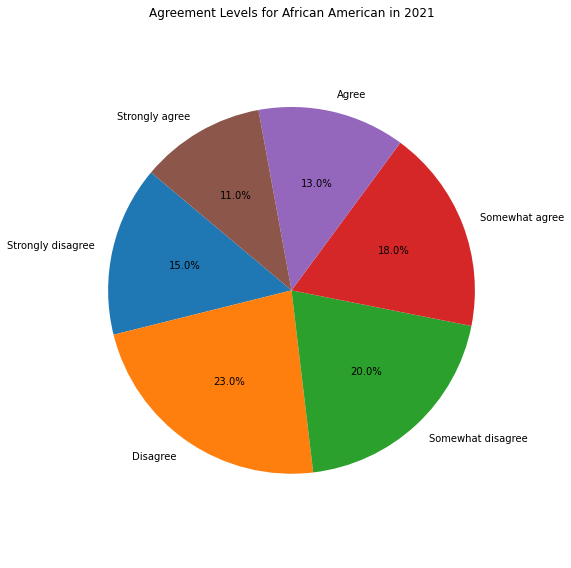

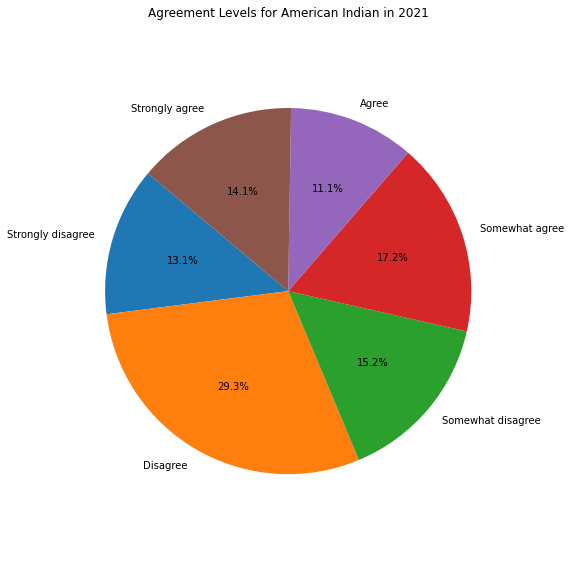

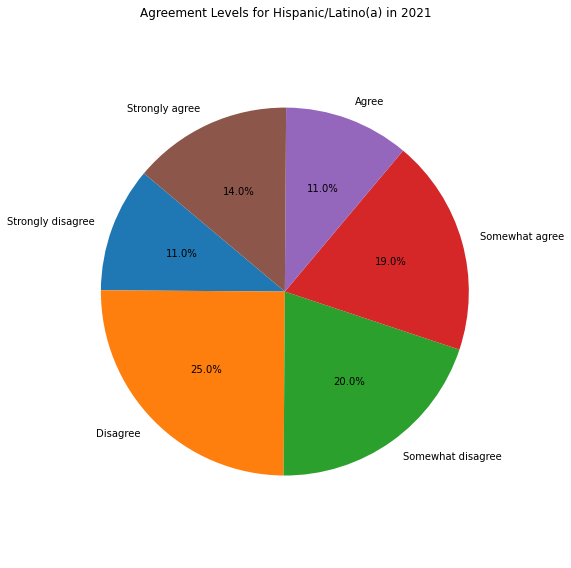

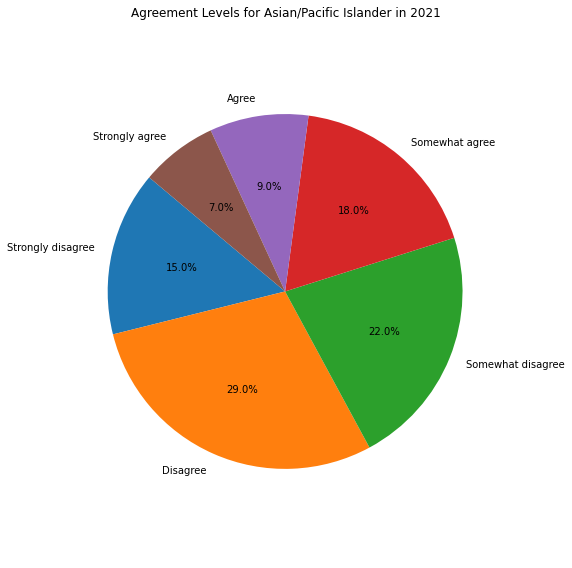

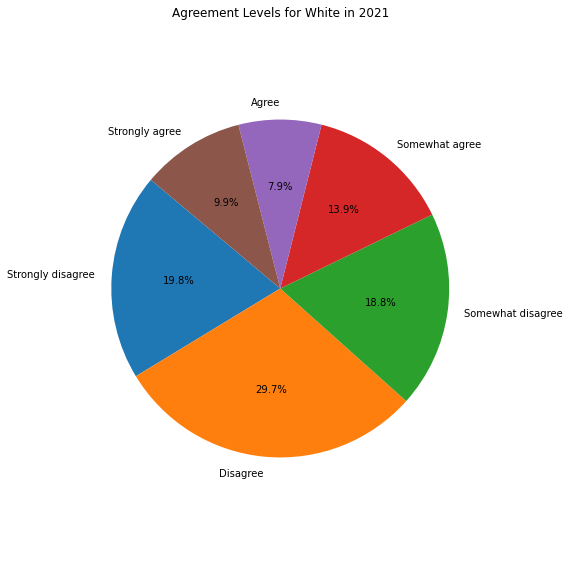

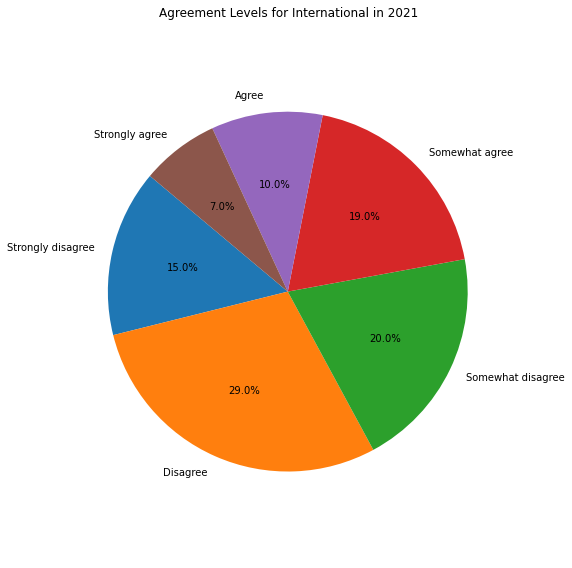

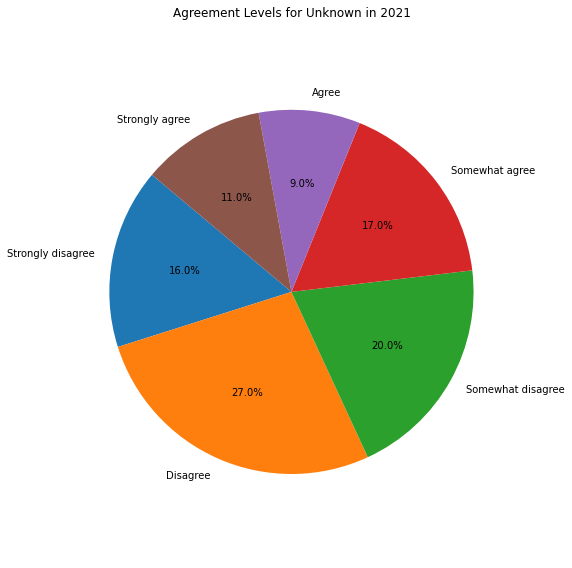

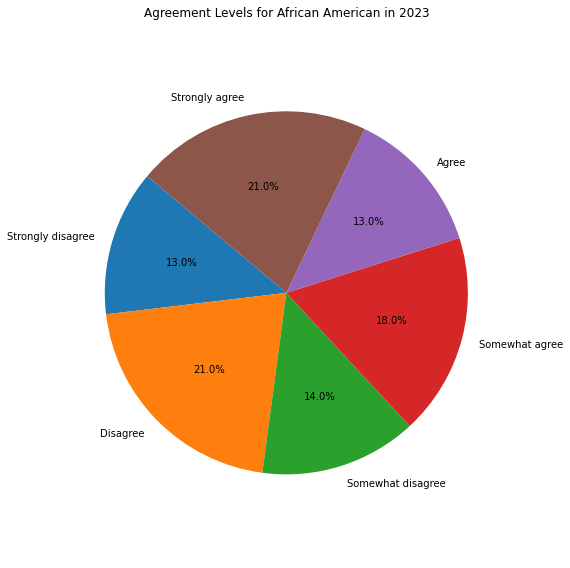

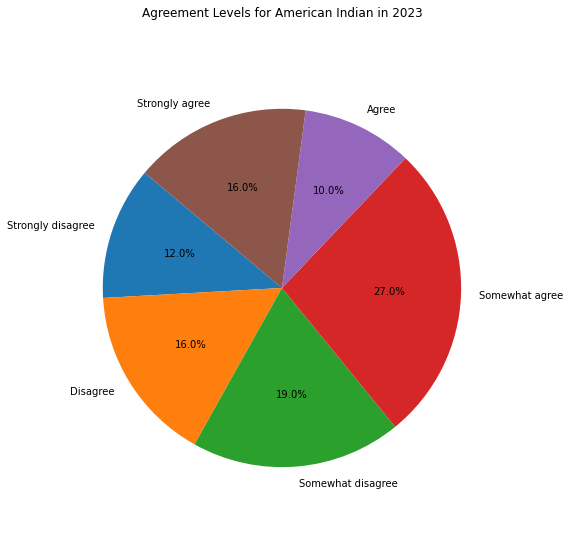

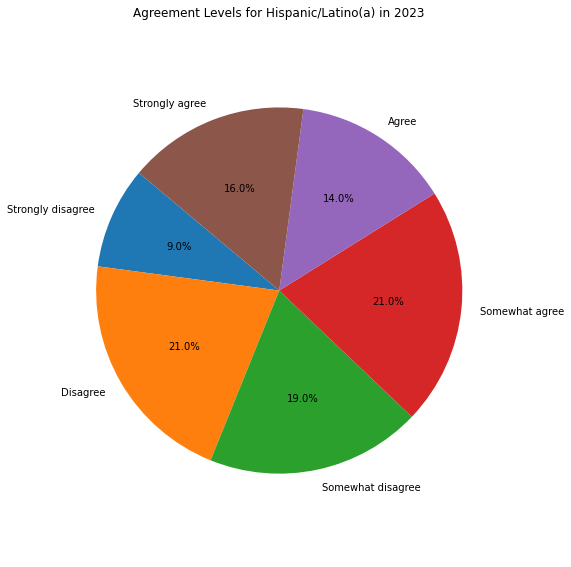

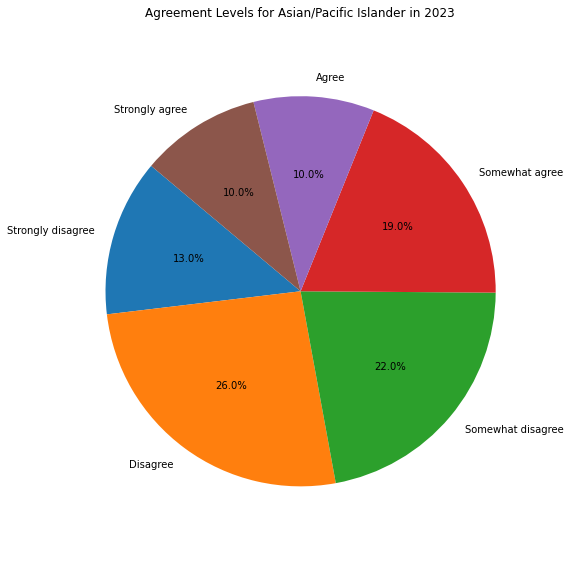

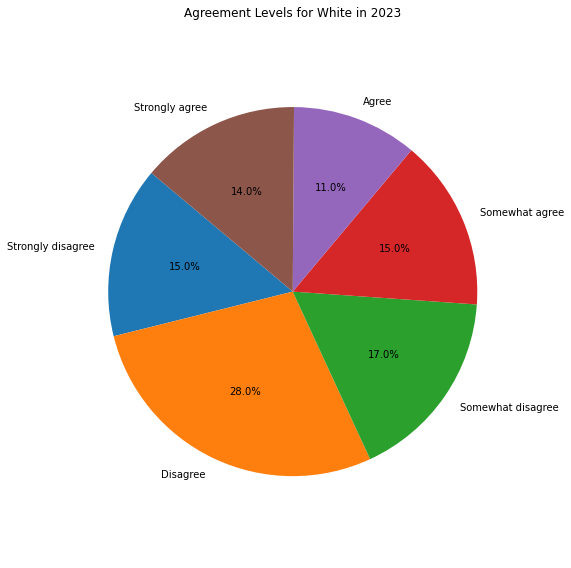

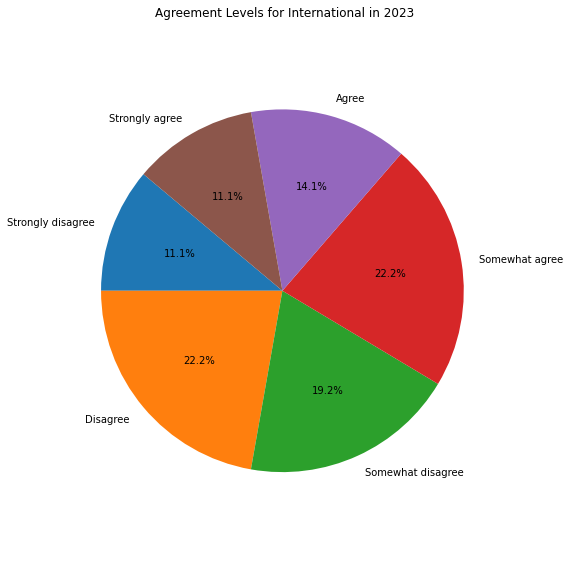

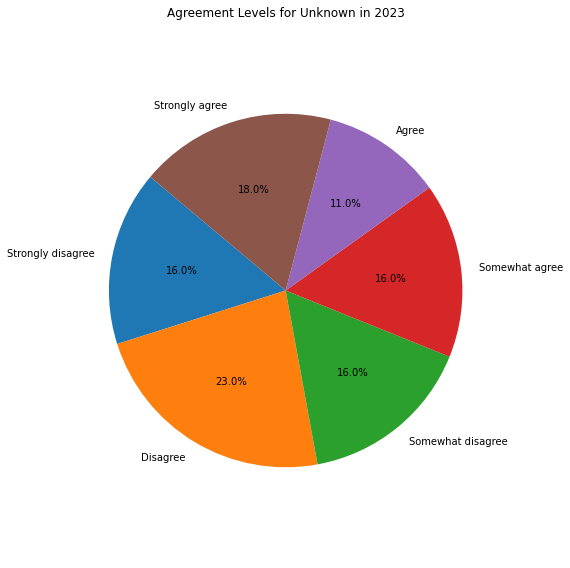

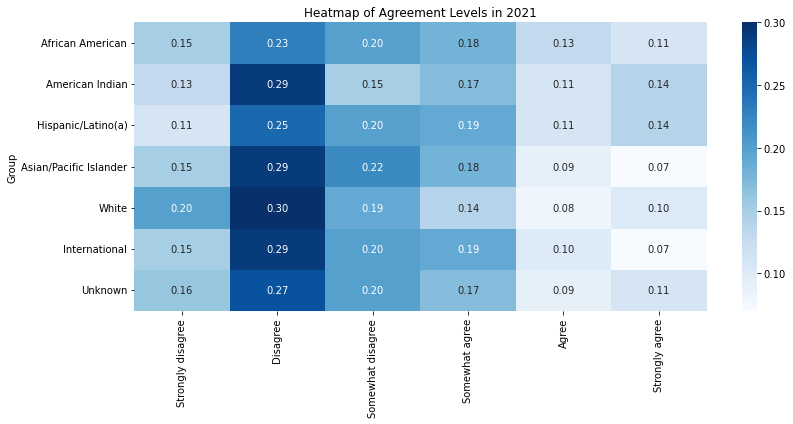

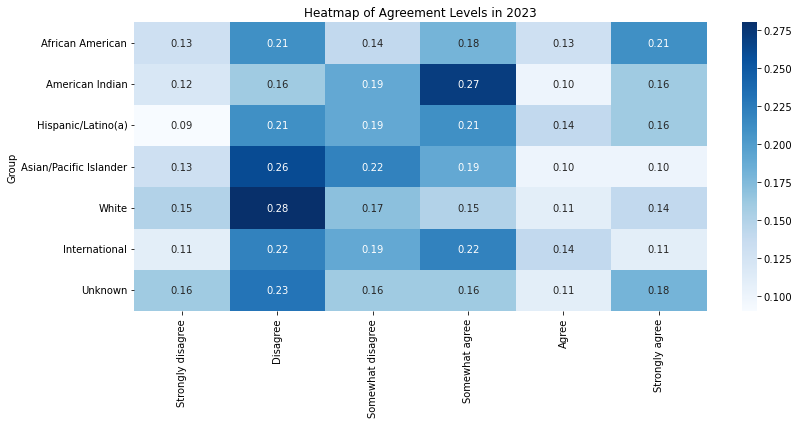

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Manually inputting the data
data = """
Group,Year,Grand Total,Strongly disagree,Disagree,Somewhat disagree,Somewhat agree,Agree,Strongly agree
African American,2021,100%,15%,23%,20%,18%,13%,11%
African American,2023,100%,13%,21%,14%,18%,13%,21%
American Indian,2021,100%,13%,29%,15%,17%,11%,14%
American Indian,2023,100%,12%,16%,19%,27%,10%,16%
Hispanic/Latino(a),2021,100%,11%,25%,20%,19%,11%,14%
Hispanic/Latino(a),2023,100%,9%,21%,19%,21%,14%,16%
Asian/Pacific Islander,2021,100%,15%,29%,22%,18%,9%,7%
Asian/Pacific Islander,2023,100%,13%,26%,22%,19%,10%,10%
White,2021,100%,20%,30%,19%,14%,8%,10%
White,2023,100%,15%,28%,17%,15%,11%,14%
International,2021,100%,15%,29%,20%,19%,10%,7%
International,2023,100%,11%,22%,19%,22%,14%,11%
Unknown,2021,100%,16%,27%,20%,17%,9%,11%
Unknown,2023,100%,16%,23%,16%,16%,11%,18%
"""

# Reading the data into a DataFrame
df = pd.read_csv(StringIO(data))

# Data cleaning
# Remove percentage signs and convert the percentage columns to numeric
for column in df.columns[3:]:  # Exclude the first three columns
    df[column] = df[column].str.replace('%', '').astype(float) / 100

# Set 'Group' and 'Year' as index
df.set_index(['Group', 'Year'], inplace=True)

# Function to create pie charts
def plot_pie_chart(year):
    year_data = df.xs(year, level='Year').reset_index()
    for index, row in year_data.iterrows():
        labels = ['Strongly disagree', 'Disagree', 'Somewhat disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
        sizes = row[labels].values
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Agreement Levels for {row["Group"]} in {year}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
        plt.tight_layout()
        plt.show()

# Plot pie charts for both years
for year in [2021, 2023]:
    plot_pie_chart(year)


# Plotting heatmaps for each year
for year in [2021, 2023]:
    heatmap_data = df.xs(year, level='Year').drop(columns='Grand Total')  # Drop 'Grand Total'
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.2f', 
                xticklabels=heatmap_data.columns, yticklabels=heatmap_data.index)
    plt.title(f'Heatmap of Agreement Levels in {year}')
    plt.tight_layout()
    plt.show()